<a href="https://colab.research.google.com/github/younghun-cha/DM_2022/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples, silhouette_score

## K-means
붓꽃 데이터 군집화

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
labels = model.predict(iris.data)
print("결과 labels : ", labels)

결과 labels :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
a_counts = np.bincount(labels[:50])
b_counts = np.bincount(labels[50:100])
c_counts = np.bincount(labels[100:])

print(a_counts)
print(b_counts)
print(c_counts)

[ 0 50]
[ 2  0 48]
[36  0 14]


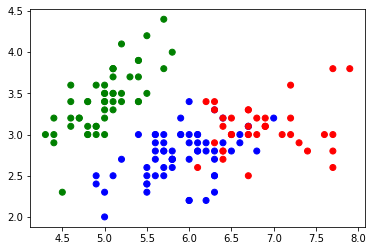

In [ ]:
colors = np.array(['red', 'green', 'blue'])
plt.scatter(iris.data[:, 0], iris.data[:, 1], color = colors[labels]);

## UCI online retail 데이터 군집화
데이터 준비

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
retail_df = pd.read_excel(url)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### 데이터 정제
- CustomerID 형변환(실수 -> 정수)
- CustomerID 결측치 제거
- 중복 레코드 제거
- Quantity, UnitPrice가 음수인 것 제외

In [ ]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
retail_df.query('Quantity < 0 or UnitPrice < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
retail_df = retail_df.dropna()
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df = retail_df.query('Quantity > 0 and UnitPrice > 0')
retail_df.drop_duplicates(inplace = True)
retail_df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [ ]:
retail_df.shape

(392692, 8)

In [ ]:
retail_df['SaleAmount'] = retail_df.UnitPrice * retail_df.Quantity
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
aggs = {'InvoiceNo':'count', 'SaleAmount':'sum', 'InvoiceDate':'max'}

customer_df = retail_df.groupby('CustomerID').agg(aggs)
customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [ ]:
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq', 'InvoiceDate':'ElapsedDays'})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [ ]:
import datetime

customer_df['ElapsedDays'] = datetime.datetime(2011, 12, 10) - customer_df['ElapsedDays']
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00
3,12349,73,1757.55,18 days 14:09:00
4,12350,17,334.40,310 days 07:59:00


In [ ]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days + 1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76
3,12349,73,1757.55,19
4,12350,17,334.40,311


### 데이터 전처리

In [ ]:
# Log tansform
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805
3,12349,73,1757.55,19,4.304065,7.472245,2.995732
4,12350,17,334.40,311,2.890372,5.815324,5.743003


In [ ]:
# scaling
X = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values
scaled_X = StandardScaler().fit_transform(X)

### 군집화

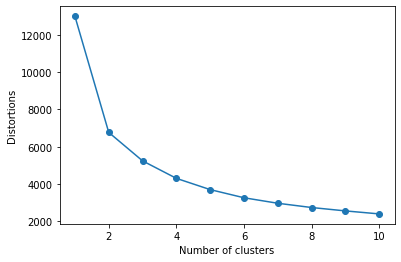

In [ ]:
# elbow 방법으로 k 구하기

distortions = []

for k in range(1, 11):
    kmeans_k = KMeans(n_clusters=k, random_state=0)
    kmeans_k.fit(scaled_X)
    distortions.append(kmeans_k.inertia_)
    
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show();

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
y = kmeans.fit_predict(scaled_X)

In [ ]:
customer_df['ClusterLabel'] = y
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0


### 결과 시각화 및 분석
- 실루엣 분석
    - 클러스터 내 데이터의 응집도를 측정
    - $a(i)$ : 클러스터 응집력 -> 데이터 i가 해당 클러스터 내의 데이터와 얼마나 가까운가
    - $b(i)$ : 클러스터 분리도 -> 가장 가까운 다른 클러스터 내의 데이터와 얼마나 떨어져 있는가
    - -1 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋은 군집화
   
$$s(x) = \frac{b(i) - a(i)}{max(a(i), b(i))}$$

In [ ]:
from matplotlib import cm

def clusterScatter(n_cluster, X_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster)
        c_colors.append(c_color)
        plt.scatter(X_features[Y_labels == i, 0], X_features[Y_labels == i, 1],
            marker='o', color=c_color, edgecolor='k', s=50, label='cluster ' + str(i))
    
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1],
            marker='^', color=c_colors[i], edgecolor='w', s=200)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [ ]:
def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')
    silhouette_avg = np.mean(silhouette_values)
    
    print('k = {0:d} 일 때 silhouette Score : {1:.3f}'.format(n_cluster, silhouette_avg))

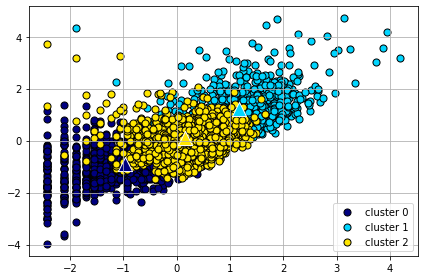

In [ ]:
clusterScatter(3, scaled_X)

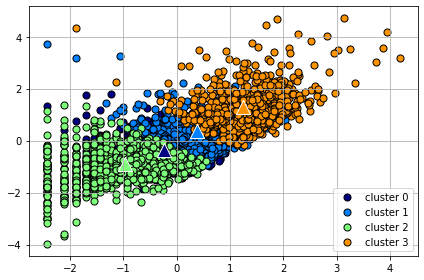

In [ ]:
clusterScatter(4, scaled_X)

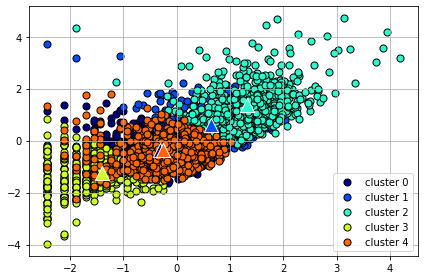

In [ ]:
clusterScatter(5, scaled_X)

In [ ]:
silhouetteViz(3, scaled_X)
silhouetteViz(4, scaled_X)
silhouetteViz(5, scaled_X)

k = 3 일 때 silhouette Score : 0.303
k = 4 일 때 silhouette Score : 0.309
k = 5 일 때 silhouette Score : 0.278


### 군집 분석의 활용 예

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_labels = kmeans.fit_predict(scaled_X)
customer_df['Clusterlabel'] = y_labels
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel,Clusterlabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2,1
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2,1
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2,1
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0,2


In [ ]:
customer_df.groupby('Clusterlabel')['CustomerID'].count()

Clusterlabel
0     891
1    1207
2    1368
3     872
Name: CustomerID, dtype: int64

In [ ]:
# 총 구매 빈도, 총 구매 금액, 마지막 구매 이후 경과일 추출
cust_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log', 'ElapsedDays_log', 'ClusterLabel'],
                                    axis=1, inplace=False)
cust_cluster_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Clusterlabel
0,12346,1,77183.60,326,1
1,12347,182,4310.00,3,3
2,12348,31,1797.24,76,1
3,12349,73,1757.55,19,1
4,12350,17,334.40,311,2


In [ ]:
# 구매 1회당 평균 구매 금액 계산
cust_cluster_df['SaleAmountAvg'] = cust_cluster_df.SaleAmount / cust_cluster_df.Freq
cust_cluster_df.drop(['CustomerID'], axis=1, inplace=False).groupby('Clusterlabel').mean()

,Freq,SaleAmount,ElapsedDays,SaleAmountAvg
Clusterlabel,,,,
0,37.811448,603.494053,20.888889,32.256335
1,79.195526,1506.813034,96.000829,102.998219
2,15.052632,298.748151,188.111842,43.338802
3,278.464450,7020.739553,13.612385,96.665836


## K-means vs. DBSCAN

### 데이터 생성

In [ ]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [ ]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

In [ ]:
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels = model.labels_.astype(np.int)
    else:
        labels = model.predict(X)

    colors = np.array(['orange', 'yellowgreen', 'royalblue', 'darkred', 'purple', 'olivegreen', 'lightblue'])
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], color=colors[labels])

### K-means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

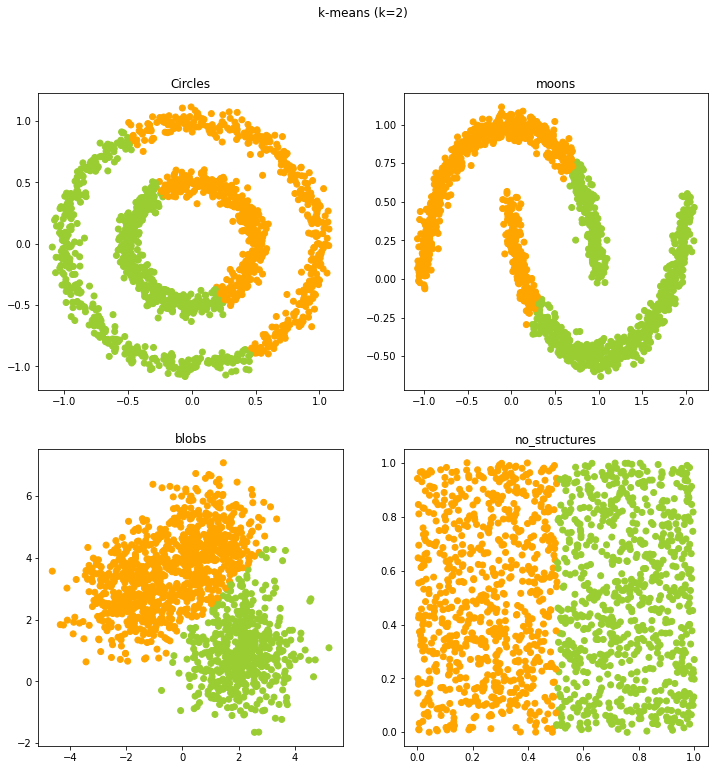

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-means (k=2)')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), moons, 222, 'moons')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), blobs, 223, 'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), no_structures, 224, 'no_structures')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

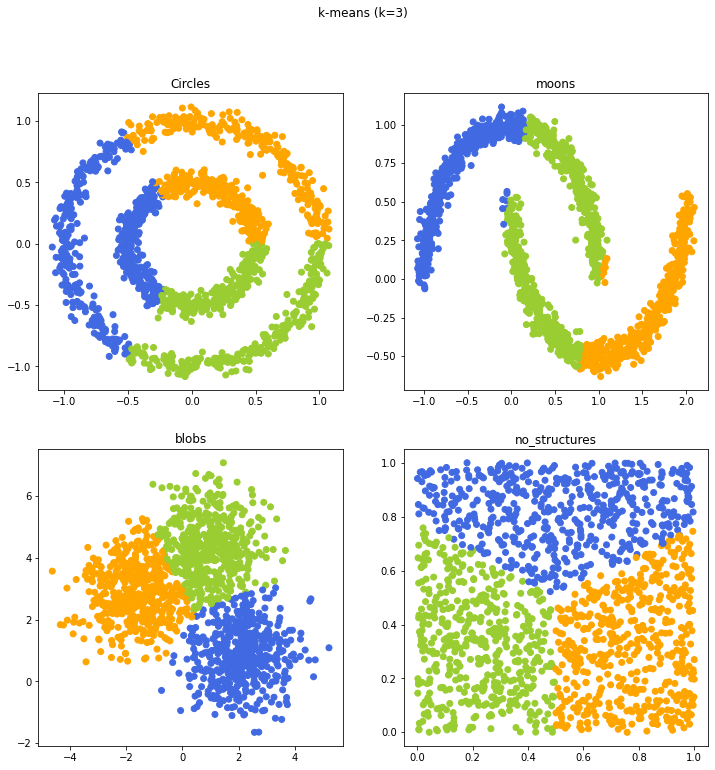

In [ ]:
fig = plt.figure(figsize = (12, 12))
fig.suptitle('k-means (k=3)')

fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), moons, 222, 'moons')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), blobs, 223, 'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'no_structures')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

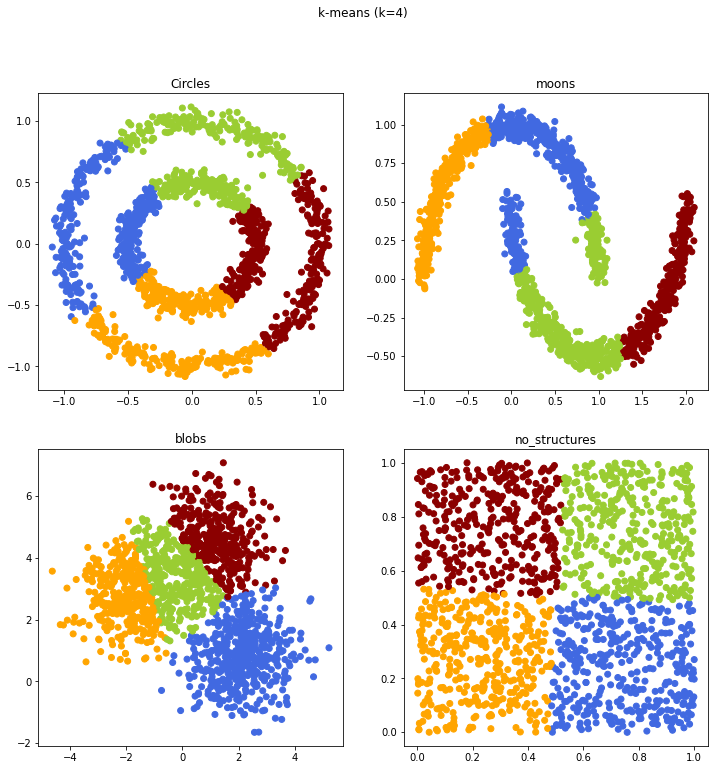

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-means (k=4)')

fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), moons, 222, 'moons')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), blobs, 223, 'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), no_structures, 224, 'no_structures')

### DBSCAN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

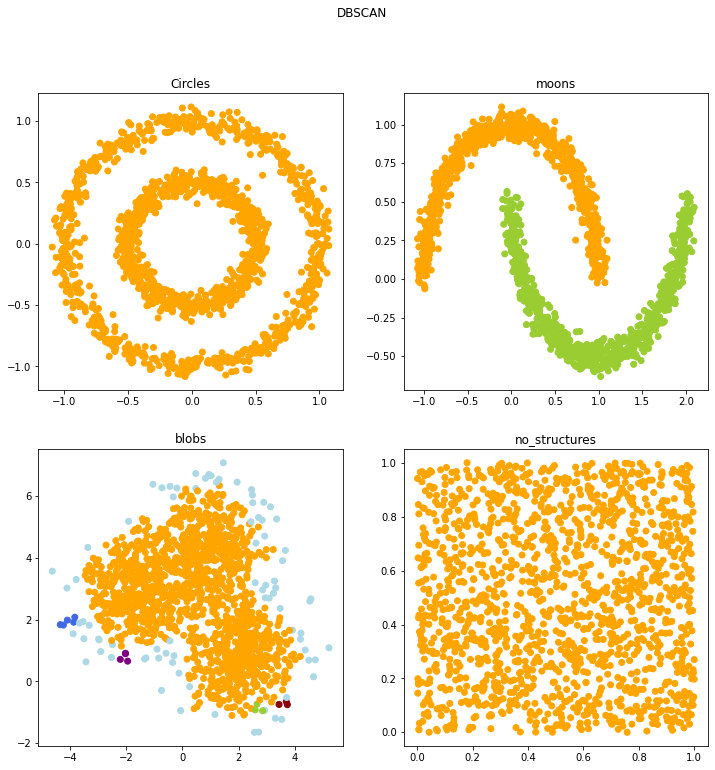

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=.3), moons, 222, 'moons')
fit_predict_plot(cluster.DBSCAN(eps=.3), blobs, 223, 'blobs')
fit_predict_plot(cluster.DBSCAN(eps=.3), no_structures, 224, 'no_structures')

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

iris = load_iris(as_frame=True)
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)
data.columns = ['Sepal_L', 'Sepal_W', 'Petal_L', 'Petal_W']
target.columns = ['target']

In [ ]:
db = DBSCAN(eps=0.6, min_samples=8).fit(data)
labels = db.labels_

In [ ]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)
print('Silhouette Coefficient: %.3f' % silhouette_score(data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 13
Silhouette Coefficient: 0.542


In [ ]:
db = DBSCAN(eps=0.8, min_samples=8).fit(data)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)
print('Silhouette Coefficient: %.3f' % silhouette_score(data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 3
Silhouette Coefficient: 0.522


In [ ]:
db = DBSCAN(eps=0.6, min_samples=16).fit(data)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)
print('Silhouette Coefficient: %.3f' % silhouette_score(data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 22
Silhouette Coefficient: 0.478


## Hierarchical Clustering

![link](https://blog.kakaocdn.net/dn/bTzUeX/btqGgj7e3dg/eTEEaa4nkKkvH3H0XtuOOk/img.png)

- Ward's linkage
    - 두 개의 클러스터가 병합되었을 때 증가되는 변동성의 양을 기준으로 하는 방법

![ward linkage](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqmBtM%2FbtqGh5f90gC%2Fc3nm1NzTvkO5p2xsj4DEBK%2Fimg.png)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)
data.columns = ['Sepal_L', 'Sepal_W', 'Petal_L', 'Petal_W']
target.columns = ['target']

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


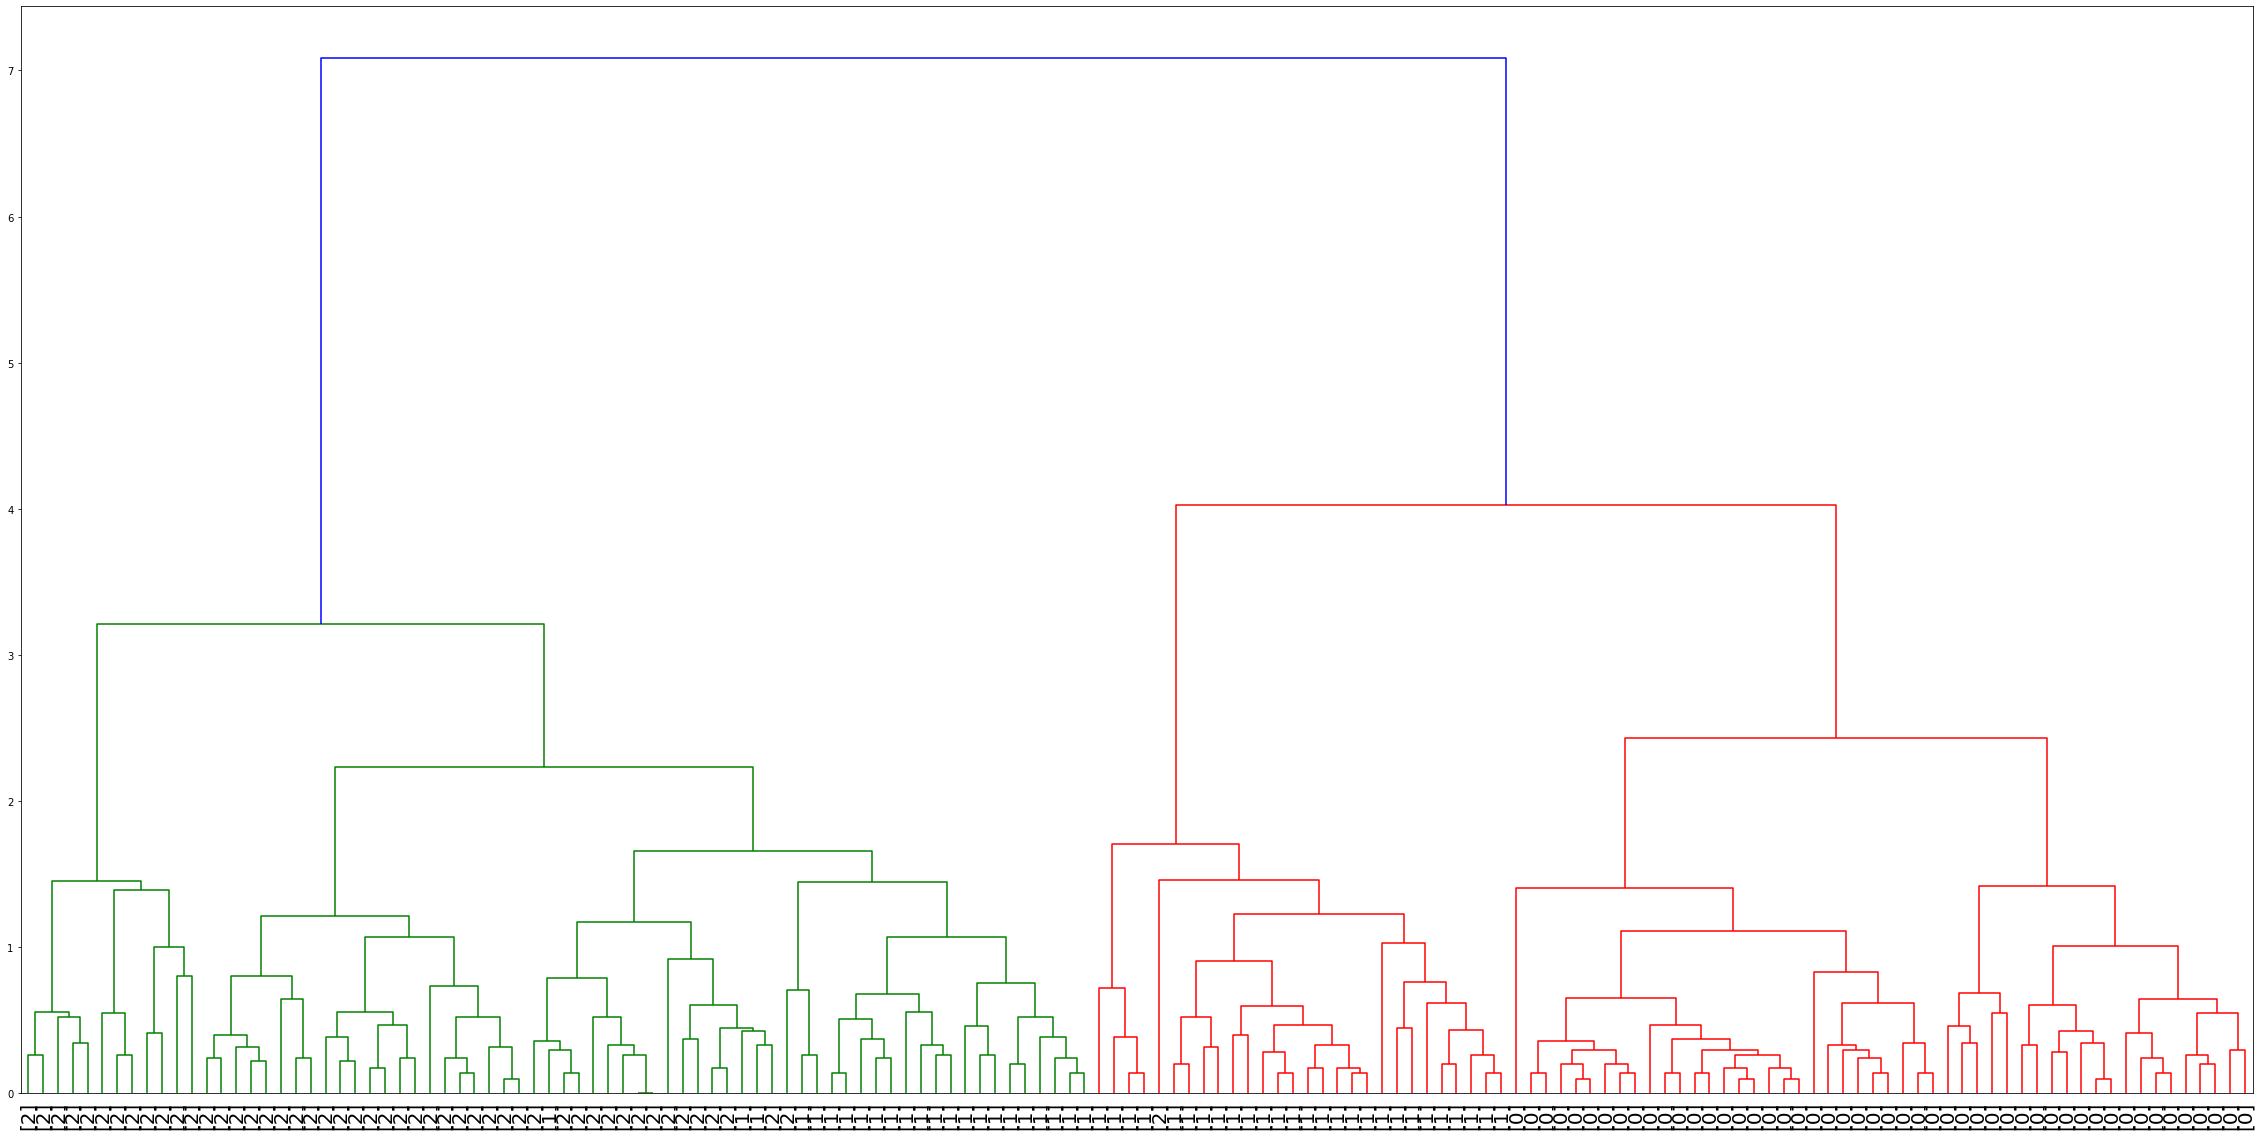

In [ ]:
mergings = linkage(data, method='complete')

plt.figure(figsize=(40, 20))

dendrogram(mergings, labels=target.values, leaf_rotation=90, leaf_font_size=20)
plt.show();

In [ ]:
predict = pd.DataFrame(fcluster(mergings, 3, criterion='distance'))
predict.columns = ['predict']
ct = pd.crosstab(predict['predict'], target['target'])
print(ct)

target    0   1   2
predict            
1         0   0  12
2         0  23  37
3         0  27   1
4        50   0   0


In [ ]:
predict = pd.DataFrame(fcluster(mergings, 4, criterion='distance'))
predict.columns = ['predict']
ct = pd.crosstab(predict['predict'], target['target'])
print(ct)

target    0   1   2
predict            
1         0  23  49
2         0  27   1
3        50   0   0
